In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [4]:
url = "https://gist.githubusercontent.com/ryanorsinger/0ec766c66f4089bdcbc1d4fb294a3394/raw/197c1f0d7b55a45f29437811bc73d9c4ef8af647/sa_temps.csv"
df = pd.read_csv(url, index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

df.head(10)

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Shape: (45252, 1)


,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
2012-10-01 18:00:00,61.327473
2012-10-01 19:00:00,61.390200
2012-10-01 20:00:00,61.452926
2012-10-01 21:00:00,61.515652


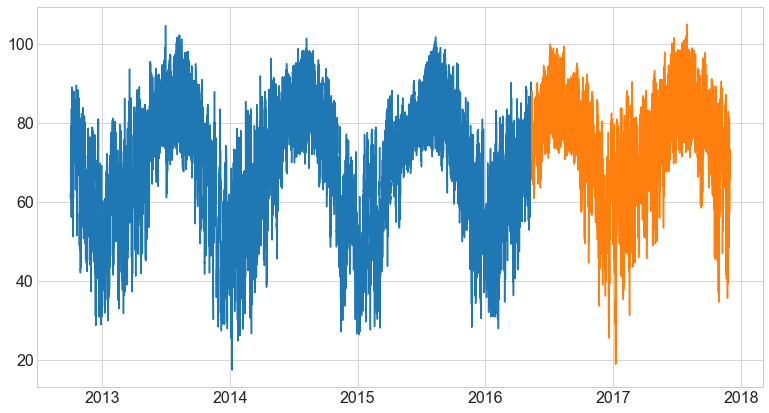

In [5]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)


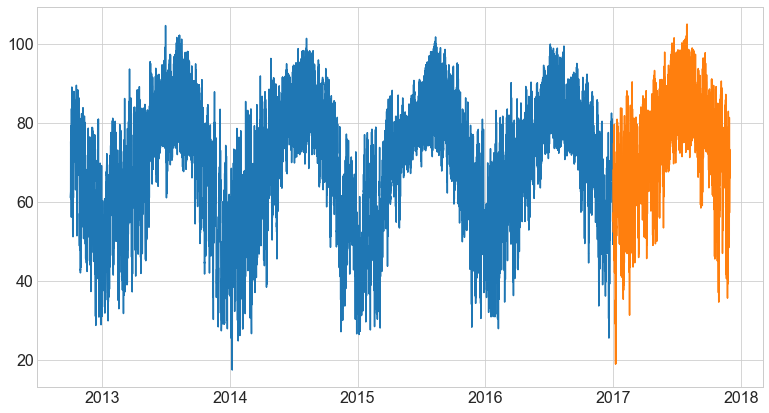

In [7]:
train = df.loc[:'2016'] # includes 2016
test = df.loc['2017']

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)


In [8]:
# visualizations

In [9]:
y = train.temp
y.head()


datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

In [10]:
# a lot of time series is pairing target variable over time variable

In [12]:
# blow off time series and treat it as normal variable 
# you can still make visuals as any other continuous variable

<AxesSubplot:ylabel='Frequency'>

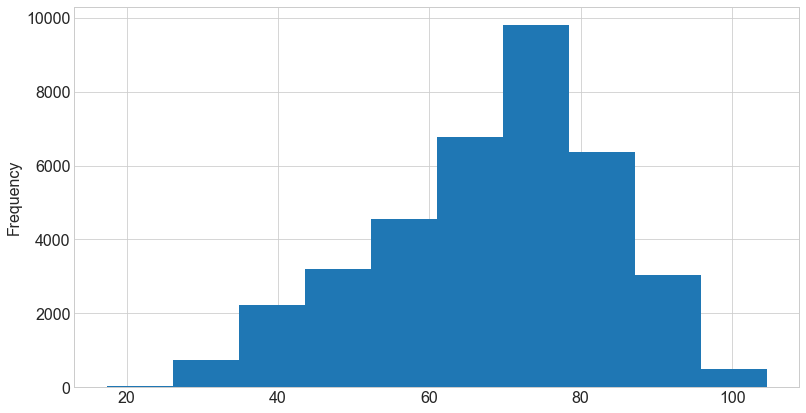

In [11]:
y.plot.hist()


[Text(0.5, 1.0, 'Average Temperature by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Temp (F)')]

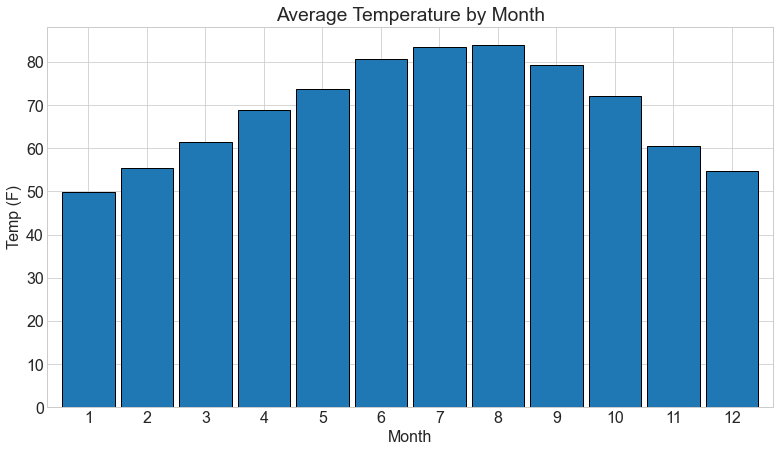

In [13]:
# can take a look at traget variable over time
# usually continuous variable and looking through components lens
# week, month, quarterly, yearly
# month of year as categorical(x), target variable as temperature(y)

ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Month', xlabel='Month', ylabel='Temp (F)')


[Text(0.5, 1.0, 'Average Temperature by Weekday'),
 Text(0.5, 22.200000000000003, 'Weekday'),
 Text(22.200000000000003, 0.5, 'Temp (F)')]

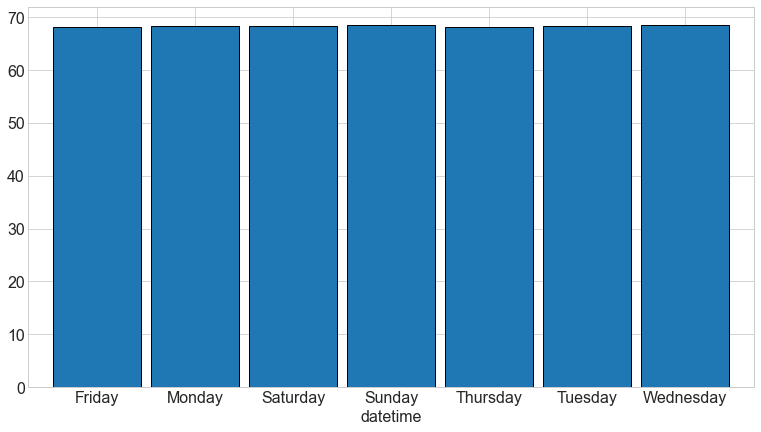

In [15]:
# same for weekday
# alphabetically ordered not 'conventional' way of ordering

y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Weekday', xlabel='Weekday', ylabel='Temp (F)')


<AxesSubplot:xlabel='weekday', ylabel='temp'>

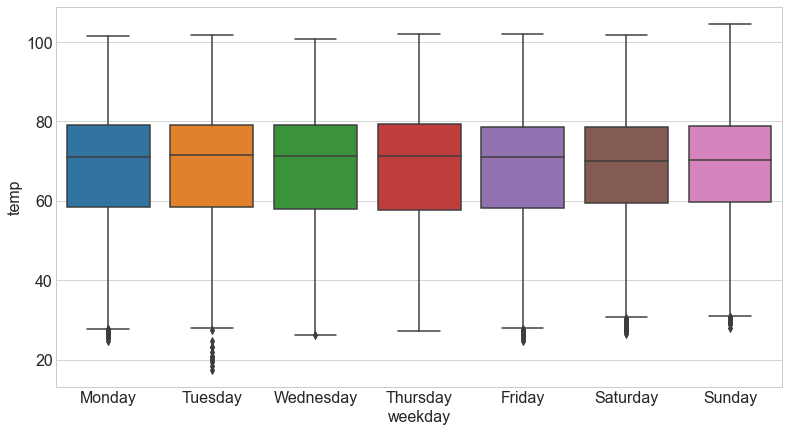

In [17]:
# temperature by weekday (weekday is categorical lens)

(
    y.reset_index()
    .assign(weekday=lambda df: df.datetime.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='temp', x='weekday')
)


<AxesSubplot:xlabel='datetime'>

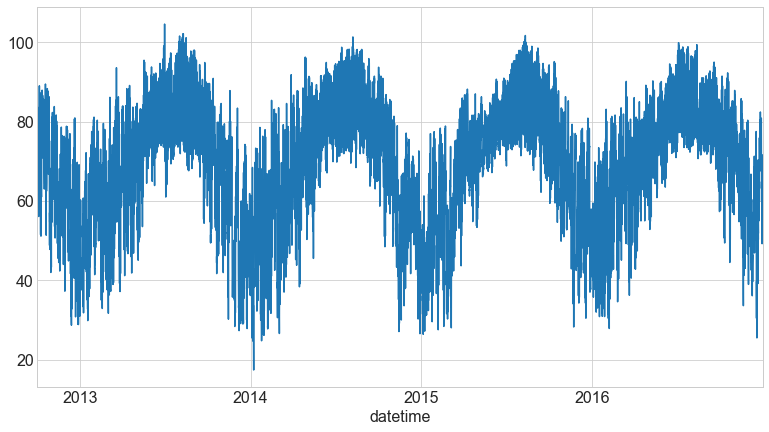

In [18]:
# visualize target variable over time

y.plot()


In [19]:
# seasonal because of the pattern,
# hourly data
# temp for each hour of day
# temp fluctuates bettwen 20 - 100 degrees

<AxesSubplot:title={'center':'6 hour average'}, xlabel='datetime'>

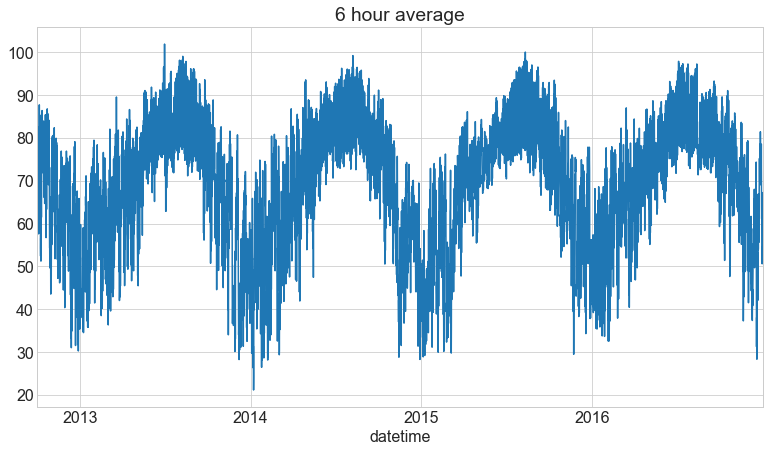

In [20]:
y.resample('6H').mean().plot(title='6 hour average')


<AxesSubplot:title={'center':'2 week average'}, xlabel='datetime'>

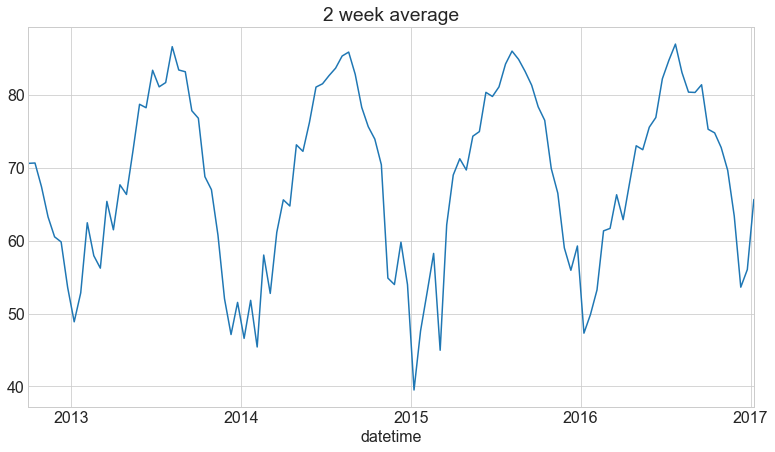

In [21]:
# resample by every 2 weeks

y.resample('2W').mean().plot(title='2 week average')


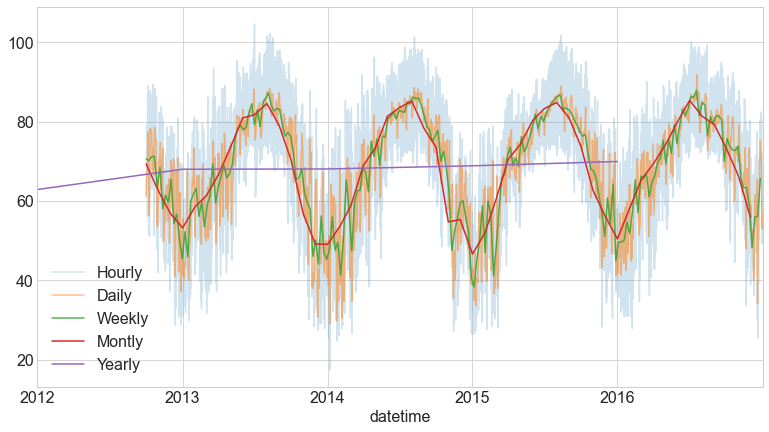

In [24]:
# combined into one visualization
# raw data along with long term trends
# avg by lower resolution time periods
# alpha is set smaller for more transparency
# higher for visibility

y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()


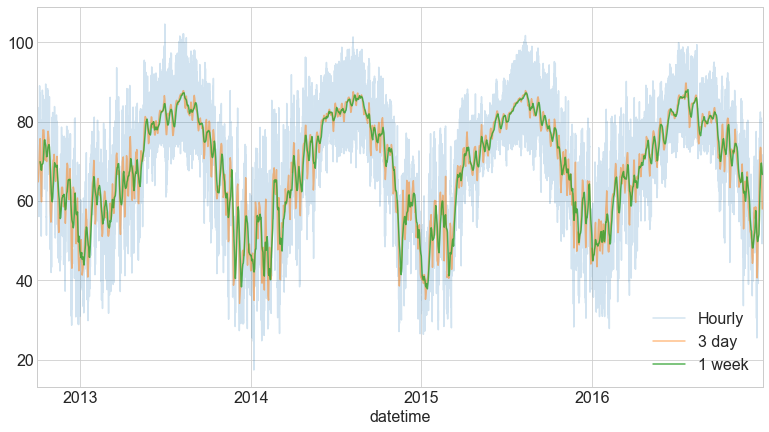

In [25]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend()


In [35]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

datetime,2012,2013,2014,2015,2016
datetime,,,,,
1,NaN,53.192333,49.072897,46.631940,50.427347
2,NaN,58.522799,53.579080,51.874683,58.165749
3,NaN,61.244479,58.842459,60.277705,65.323011
4,NaN,66.569717,68.908933,70.526879,69.415316
5,NaN,73.358529,73.311970,74.169747,74.129780
6,NaN,80.885728,81.337658,80.135967,80.097570
7,NaN,81.731819,83.476876,83.264325,85.325640
8,NaN,84.534117,85.178102,84.789859,81.357023
9,NaN,79.016805,78.238621,80.938208,79.233476


In [36]:
y.groupby([y.index.year, y.index.month]).mean().unstack()

datetime,1,2,3,4,5,6,7,8,9,10,11,12
datetime,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.318705,62.521575,56.860014
2013,53.192333,58.522799,61.244479,66.569717,73.358529,80.885728,81.731819,84.534117,79.016805,70.343832,56.686028,49.165310
2014,49.072897,53.579080,58.842459,68.908933,73.311970,81.337658,83.476876,85.178102,78.238621,73.567252,54.735951,55.311824
2015,46.631940,51.874683,60.277705,70.526879,74.169747,80.135967,83.264325,84.789859,80.938208,73.766466,62.519181,56.207118
2016,50.427347,58.165749,65.323011,69.415316,74.129780,80.097570,85.325640,81.357023,79.233476,73.284788,66.265047,55.903224


In [38]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

datetime,1,2,3,4,5,6,7,8,9,10,11,12
datetime,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.318705,62.521575,56.860014
2013,53.192333,58.522799,61.244479,66.569717,73.358529,80.885728,81.731819,84.534117,79.016805,70.343832,56.686028,49.165310
2014,49.072897,53.579080,58.842459,68.908933,73.311970,81.337658,83.476876,85.178102,78.238621,73.567252,54.735951,55.311824
2015,46.631940,51.874683,60.277705,70.526879,74.169747,80.135967,83.264325,84.789859,80.938208,73.766466,62.519181,56.207118
2016,50.427347,58.165749,65.323011,69.415316,74.129780,80.097570,85.325640,81.357023,79.233476,73.284788,66.265047,55.903224


In [40]:
for month_number, subset in table.iteritems():
    print(month_number)

1
2
3
4
5
6
7
8
9
10
11
12


In [42]:
for number, letter in zip([1,2,3], ['a', 'b', 'c']):
    print(number, letter)


1 a
2 b
3 c


<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='datetime'>

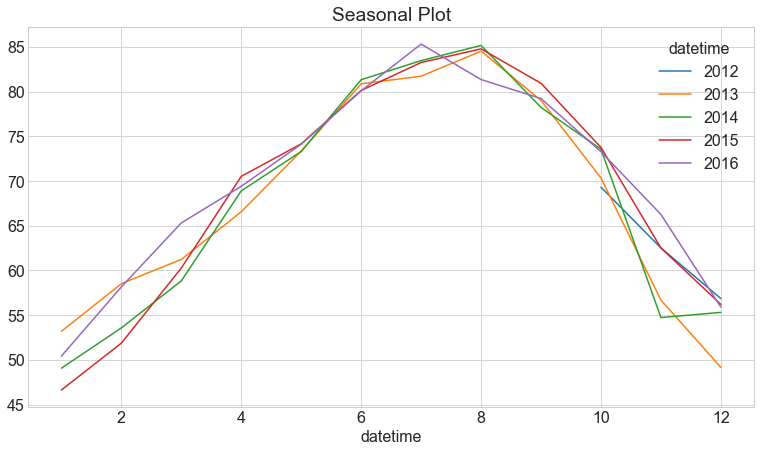

In [26]:
# seasonal plot
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


In [27]:
# we think we have yearly seasons
# multiple trendlines, one for each season
# set x axis to some subdivision of that season
# daily seaonality, x axis might be hour
# here x is month of year and y is average tempf or that month

# looking for any chang ein lines over time
# ex lines could have trend up and that cound indicate temp is increasing over time


## seasonal subseries plot
- avg temp for each onth yer. over year

<AxesSubplot:xlabel='datetime'>

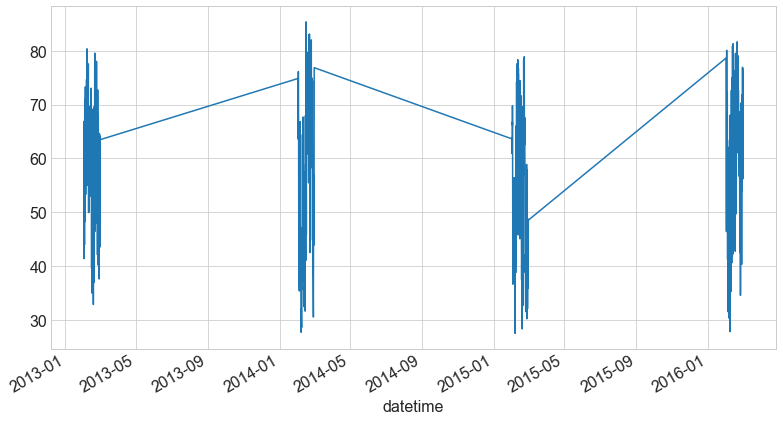

In [33]:
y[y.index.month ==2].plot()

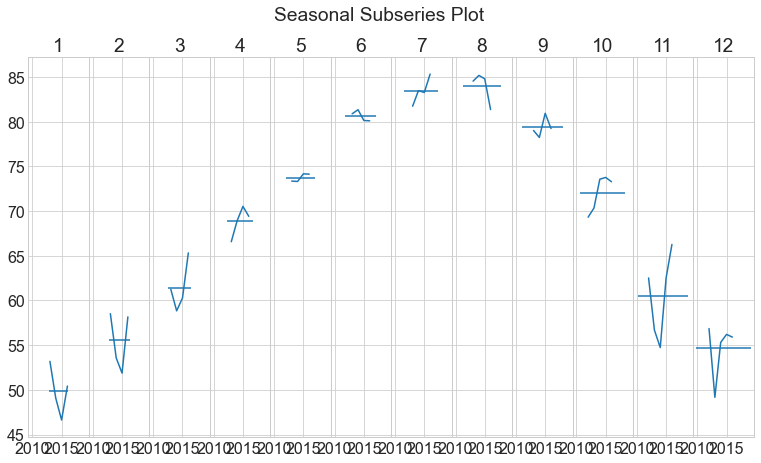

In [28]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)


In [43]:
# comparing value over time
# seeing if it is changing within each subdivision
# also looking at the average line

# code breakdown
# start with almost the same data as before
#

Text(0.5, 1.0, 'Lag plot with lag=1')

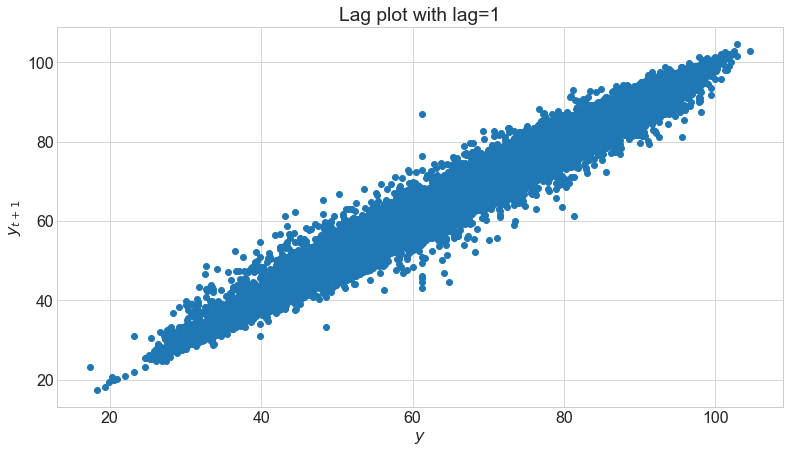

In [44]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')


/var/folders/dy/6l70n7994h596yst0fdjbly40000gn/T/ipykernel_80807/3662136212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y(t + 1)'] = train.temp.shift(-1)


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

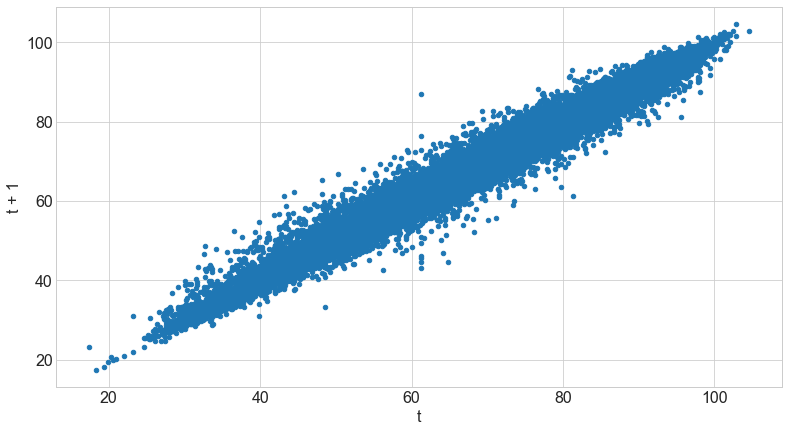

In [45]:
train['y(t + 1)'] = train.temp.shift(-1)
ax = train.plot.scatter(x='temp', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')


In [46]:
del train['y(t + 1)']


,this_week,the_next_week
datetime,,
2012-10-07,70.595201,70.152821
2012-10-14,70.152821,71.138375
2012-10-21,71.138375,71.230464
2012-10-28,71.230464,63.510554
2012-11-04,63.510554,68.482625
...,...,...
2016-12-04,59.062094,48.163625
2016-12-11,48.163625,55.979132
2016-12-18,55.979132,56.073143


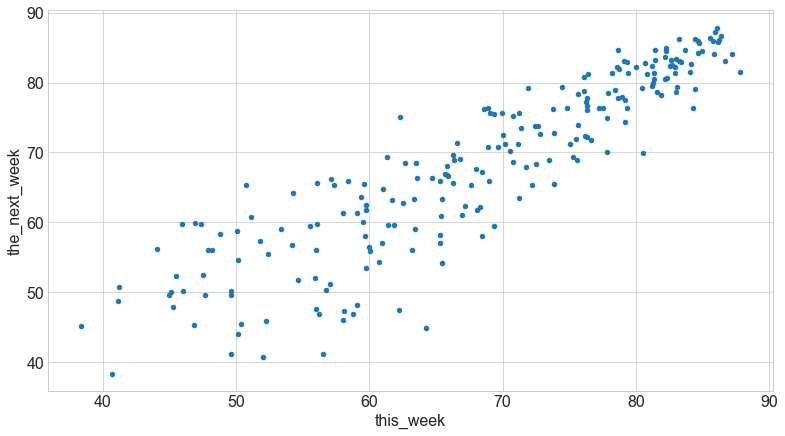

In [51]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.temp.shift(-1)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly


,this_week,12_weeks_out
datetime,,
2012-10-07,70.595201,59.638196
2012-10-14,70.152821,65.431679
2012-10-21,71.138375,54.209911
2012-10-28,71.230464,56.765589
2012-11-04,63.510554,50.376741
...,...,...
2016-12-04,59.062094,NaN
2016-12-11,48.163625,NaN
2016-12-18,55.979132,NaN


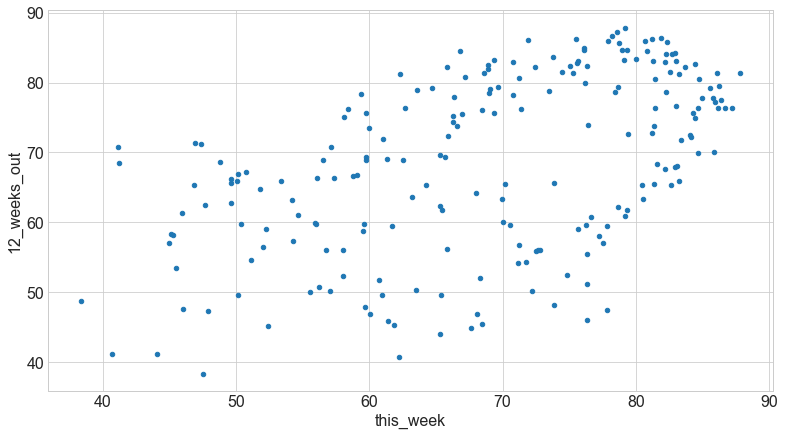

In [53]:
#changing the weekly view to 8 weeks from now
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.temp.shift(-8)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,this_week,12_weeks_out
datetime,,
2012-10-07,70.595201,50.376741
2012-10-14,70.152821,45.473616
2012-10-21,71.138375,52.252877
2012-10-28,71.230464,45.907936
2012-11-04,63.510554,59.763739
...,...,...
2016-12-04,59.062094,NaN
2016-12-11,48.163625,NaN
2016-12-18,55.979132,NaN


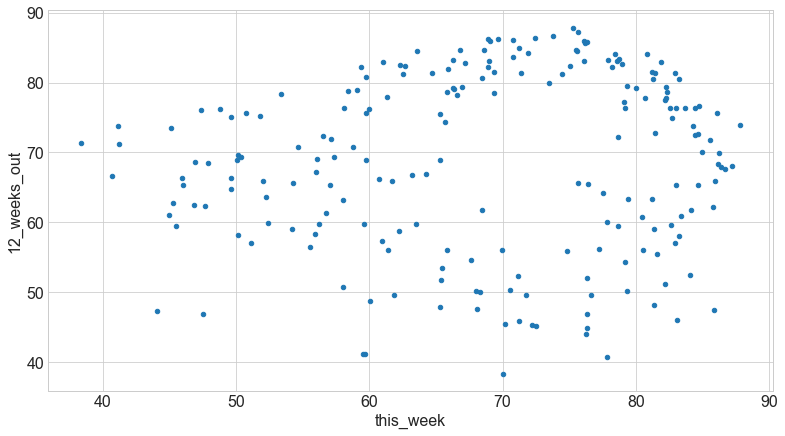

In [54]:
# looking at temp and 12 weeks from now
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.temp.shift(-12)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly


,this_week,half_a_year_later
datetime,,
2012-10-07,70.595201,63.558611
2012-10-14,70.152821,66.345532
2012-10-21,71.138375,68.965502
2012-10-28,71.230464,65.862071
2012-11-04,63.510554,66.797107
...,...,...
2016-12-04,59.062094,NaN
2016-12-11,48.163625,NaN
2016-12-18,55.979132,NaN


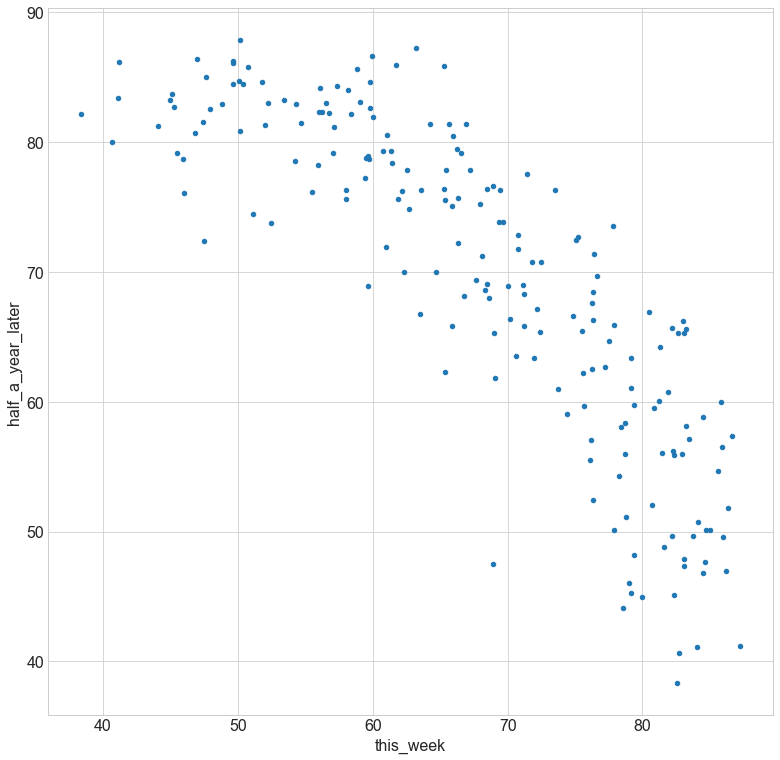

In [56]:
# 26 weeks out, half a year from now
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.temp.shift(-26)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 52)'>

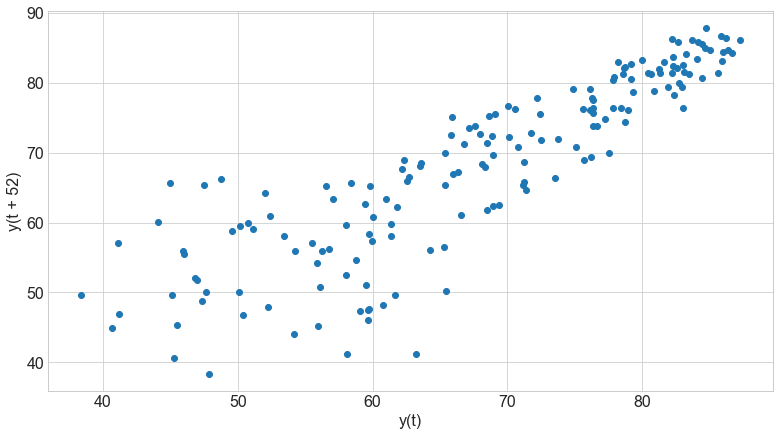

In [60]:
# looking at our data and the data shifted to 52
# temperature now and temp next year

pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=52)


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2)'>

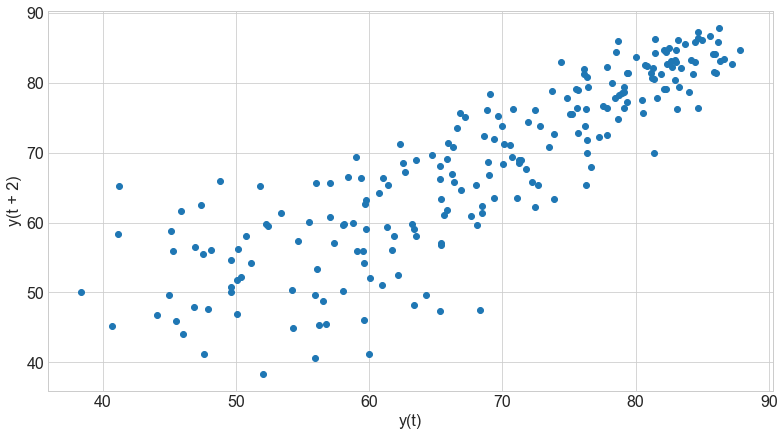

In [61]:
pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=2)


In [62]:
# each lagplot can have pearsons r calculated 
# quantify how correlated the two features are

# would start strong
# as lag increased it would get weeker
# up until you are at opposite end of season cycle 
# and then pick back up when you get back into 1 season later
# call thisa n auto correlation plot


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

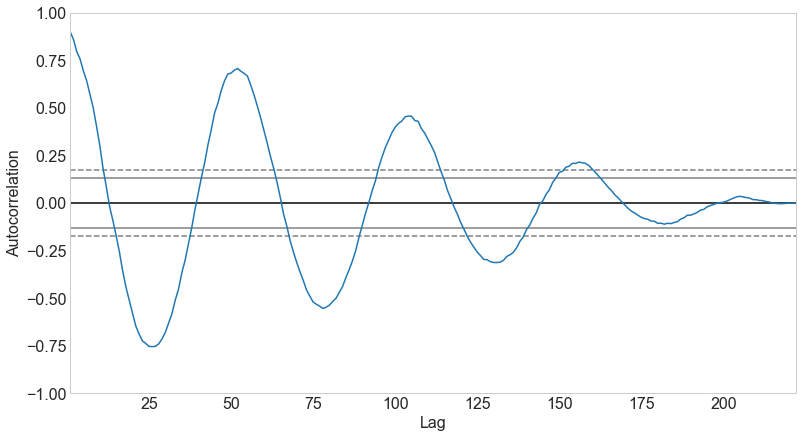

In [63]:
pd.plotting.autocorrelation_plot(train.temp.resample('W').mean())


In [68]:
# train data resampled to weekly frequency
# dataframe created of those seasonal properties
# stats model library used below

In [64]:
y = train.temp.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
datetime,,,,
2012-10-07,70.595201,NaN,8.545501,NaN
2012-10-14,70.152821,NaN,7.255470,NaN
2012-10-21,71.138375,NaN,2.468309,NaN
2012-10-28,71.230464,NaN,1.820126,NaN
2012-11-04,63.510554,NaN,-0.114287,NaN


<AxesSubplot:xlabel='datetime'>

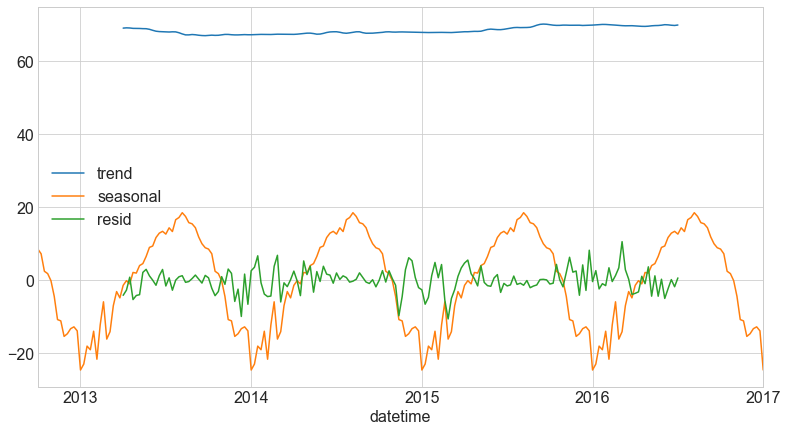

In [65]:
decomposition.iloc[:, 1:].plot()


In [ ]:
# looking at trends
# seasonal and residual

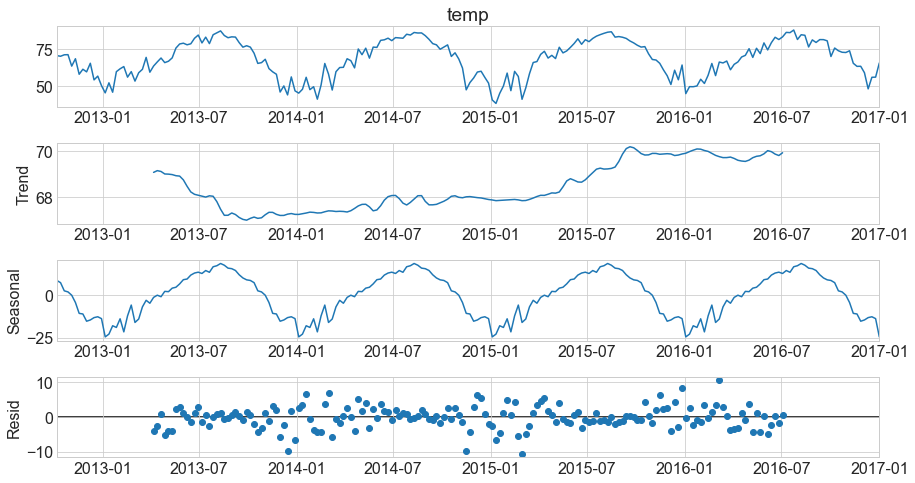

In [66]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None


In [67]:
train = train.resample('D').mean()
# create a categorical feature
train['temp_bin'] = pd.qcut(train.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])
train.groupby('temp_bin').mean()


,temp
temp_bin,
cold,49.381699
cool,65.200219
warm,75.447977
hot,83.449087


In [69]:
# area s over time


Text(0, 0.5, '% of days in the month')

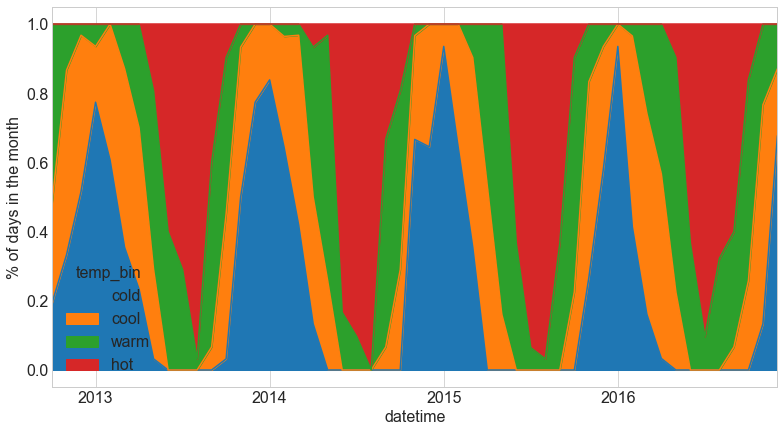

In [71]:
(train.groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')


In [73]:
table = (train.groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0))
 
#.plot.area())
#plt.ylabel('% of days in the month')
# dividing each by sum of row and taking it
table.apply(lambda row: row / row.sum(), axis=1)

temp_bin,cold,cool,warm,hot
datetime,,,,
2012-10-31,0.193548,0.290323,0.516129,NaN
2012-11-30,0.333333,0.533333,0.133333,NaN
2012-12-31,0.516129,0.451613,0.032258,NaN
2013-01-31,0.774194,0.161290,0.064516,NaN
2013-02-28,0.607143,0.392857,0.000000,NaN
2013-03-31,0.354839,0.516129,0.129032,NaN
2013-04-30,0.233333,0.466667,0.300000,NaN
2013-05-31,0.032258,0.258065,0.516129,0.193548
2013-06-30,0.000000,0.000000,0.400000,0.600000


/var/folders/dy/6l70n7994h596yst0fdjbly40000gn/T/ipykernel_80807/166317864.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax = (train['2015']


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

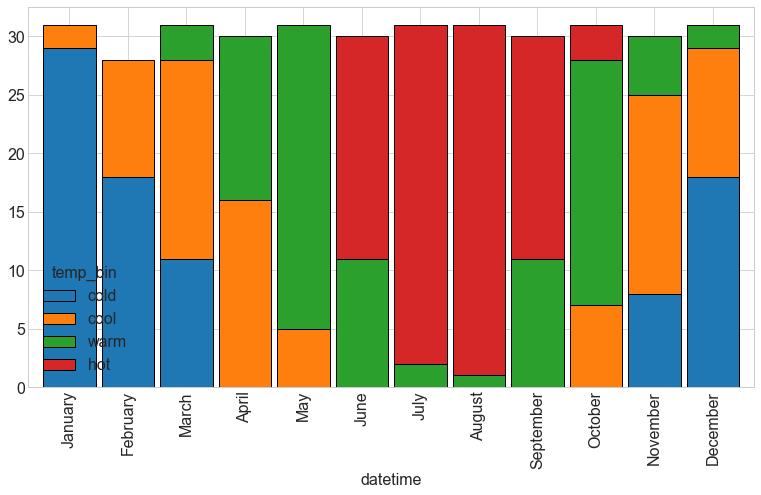

In [74]:
ax = (train['2015']
 .groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)


In [75]:
# depending on who audience in
# just show a trend over time or difference over time
# and probably resample, barplots are best
# maybe an area plot over time?


## strftime

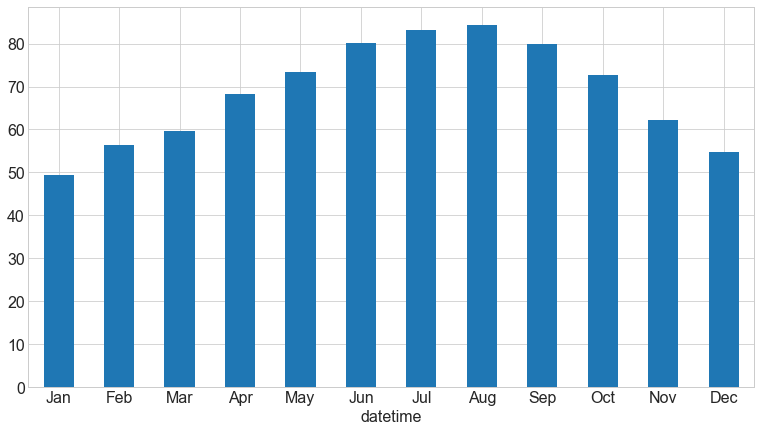

In [76]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None
